# Understanding Data Science Classification Metrics in Sci-kit Learn

In this tutorial, we will walk through a few classifications metrics in Python's scikit-learn and write our own functions from scratch to understand the math behind a few of them.

One major area of predictive modeling in data science is classification. Classification consists of trying to predict which class a particular sample from a population comes from. 



For example, if we are trying to predict if a particular patient will be re-hospitalized, the two possible classes are hospital (positive) and not-hospitalized (negative). 




The classification model then tries to predict if each patient will be hospitalized or not hospitalized. In other words, classification is simply trying to predict which bucket (predicted positive vs predicted negative) a particular sample from the population should be placed as seen below.

<img src="img/classification.png" alt="Drawing" style="width: 400px;"/>

As you train your classification predictive model, you will want to assess how good it is. Interestingly, there are many different ways of evaluating the performance. Most data scientists that use Python for predictive modeling use the Python package called scikit-learn. Scikit-learn contains many built-in functions for analyzing the performance of models. 




Here, we will walk through a few of these metrics and write our own functions from scratch to understand the math behind some of them.  

We will cover the following metrics functions from `sklearn.metrics` :

    - confusion_matrix
    - accuracy_score
    - recall_score
    - precision_score
    - f1_score
    - roc_curve
    - roc_auc_score

Here we will write our own functions from scratch assuming a two-class classification.

Let's load a sample data set that has the actual labels (actual_label) and the prediction probabilities for two models (model_RF and model_LR). Here the probabilities are the probability of being class 1.

In [4]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In most data science projects, you will define a threshold to define which prediction probabilities are labeled as predicted positive vs predicted negative. For now let's assume the threshold is 0.5. Let's add two additional columns that convert the probabilities to predicted labels. 

In [10]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head(20)

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0
5,0,0.540665,0.582447,1,1
6,0,0.333361,0.376542,0,0
7,0,0.309166,0.287872,0,0
8,0,0.532531,0.524141,1,1
9,0,0.423434,0.435693,0,0


# confusion_matrix

Given an actual label and a predicted label, the first thing we can do is divide our samples in 4 buckets:
    - True positive - actual = 1, predicted = 1
    - False positive - actual = 0, predicted = 1
    - False negative - actual = 1, predicted = 0
    - True negative - actual = 0, predicted = 0

These buckets can be represented with the following image (original source https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg) and we will reference this image in many of the calculations below.

<img src="img/buckets.png" alt="Drawing" style="width: 200px;"/>

These buckets can also be displayed using a confusion matrix as shown below:

<img src="img/conf_matrix.png" alt="Drawing" style="width: 400px;"/>

We can obtain the confusion matrix (as a 2x2 array) from scikit learn, which takes as inputs the actual labels and the predicted labels

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

where there were 5047 true positives, 2360 false positives, 2832 false negatives and 5519 true negatives. Let's define our own functions to verify `confusion_matrix`. Note that I filled in the first one and you need to fill in the other 3. 

In [5]:
def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return # your code here
def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return # your code here
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return # your code here

print('TP:',find_TP(df.actual_label.values, df.predicted_RF.values))
print('FN:',find_FN(df.actual_label.values, df.predicted_RF.values))
print('FP:',find_FP(df.actual_label.values, df.predicted_RF.values))
print('TN:',find_TN(df.actual_label.values, df.predicted_RF.values))

TP: 5047
FN: None
FP: None
TN: None


Let's write a function that will calculate all four of these for us, and another function to duplicate `confusion_matrix`

In [6]:
import numpy as np
def find_conf_matrix_values(y_true,y_pred):
    # calculate TP, FN, FP, TN
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN
def my_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

In [7]:
my_confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[None, None],
       [None, 5047]], dtype=object)

Let's verify that our functions worked using Python's built in `assert` and numpy's `array_equal` functions

In [8]:
assert  np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_RF.values),\
                       confusion_matrix(df.actual_label.values, df.predicted_RF.values) ), 'my_confusion_matrix() is not correct for RF'

assert  np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_LR.values),\
                       confusion_matrix(df.actual_label.values, df.predicted_LR.values) ), 'my_confusion_matrix() is not correct for LR'

AssertionError: my_confusion_matrix() is not correct for RF

Given these four buckets (TP, FP, FN, TN), we can calculate many other performance metrics. 

# accuracy_score

The most common metric for classification is accuracy, which is the fraction of samples predicted correctly as shown below: 

<img src="img/accuracy.png" alt="Drawing" style="width: 400px;"/>

We can obtain the accuracy score from scikit learn, which takes as inputs the actual labels and the predicted labels

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

Define your own function that duplicates `accuracy_score`, using the formula above. 

In [10]:
def my_accuracy_score(y_true, y_pred):
    # calculates the fraction of samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return # your code here

In [11]:
assert my_accuracy_score(df.actual_label.values, df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Accuracy RF: %.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Accuracy LR: %.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_LR.values)))

AssertionError: my_accuracy_score failed on RF

Using accuracy as a performance metric, the RF model is more accurate than the LR model. So should we stop here and say RF model is the best model? No! Accuracy is not always the best metric to use to assess classification models. For example, let's say that we are trying to predict something that only happens 1 out of 100 times. We could build a model that gets 99% accuracy by saying the event never happened. However, we catch 0% of the events we care about. The 0% measure here is another performance metric known as recall. 

# recall_score

Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly as shown below:

<img src="img/recall.png" alt="Drawing" style="width: 300px;"/>

We can obtain the accuracy score from scikit-learn, which takes as inputs the actual labels and the predicted labels

In [12]:
from sklearn.metrics import recall_score

recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

Define your own function that duplicates `recall_score`, using the formula above. 

In [13]:
def my_recall_score(y_true, y_pred):
    # calculates the fraction of positive samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return # your code here

In [14]:
assert my_recall_score(df.actual_label.values, df.predicted_RF.values) == recall_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_recall_score(df.actual_label.values, df.predicted_LR.values) == recall_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall LR: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_LR.values)))

AssertionError: my_accuracy_score failed on RF

One method to boost the recall is to increase the number of samples that you define as predicted positive by lowering the threshold for predicted positive. Unfortunately, this will also increase the number of false positives. Another performance metric called precision takes this into account.

# precision_score

Precision is the fraction of predicted positives events that are actually positive as shown below:

<img src="img/precision.png" alt="Drawing" style="width: 300px;"/>

We can obtain the accuracy score from scikit-learn, which takes as inputs the actual labels and the predicted labels

In [15]:
from sklearn.metrics import precision_score

precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

Define your own function that duplicates `precision_score`, using the formula above. 

In [16]:
def my_precision_score(y_true, y_pred):
    # calculates the fraction of predicted positives samples that are actually positive
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return # your code here

assert my_precision_score(df.actual_label.values, df.predicted_RF.values) == precision_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_precision_score(df.actual_label.values, df.predicted_LR.values) == precision_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Precision RF: %.3f'%(my_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision LR: %.3f'%(my_precision_score(df.actual_label.values, df.predicted_LR.values)))

AssertionError: my_accuracy_score failed on RF

In this case, it looks like RF model is better at both recall and precision. But what would you do if one model was better at recall and the other was better at precision. One method that some data scientists use is called the F1 score. 

# f1_score

The f1 score is the harmonic mean of recall and precision, with a higher score as a better model. The f1 score is calculated using the following formula:

<img src="img/f1_score.png" alt="Drawing" style="width: 400px;"/>

We can obtain the f1 score from scikit-learn, which takes as inputs the actual labels and the predicted labels

In [17]:
from sklearn.metrics import f1_score

f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

Define your own function that duplicates `f1_score`, using the formula above. 

In [18]:
def my_f1_score(y_true, y_pred):
    # calculates the F1 score
    recall = my_recall_score(y_true,y_pred)  
    precision = my_precision_score(y_true,y_pred)  
    return # your code here

assert my_f1_score(df.actual_label.values, df.predicted_RF.values) == f1_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_f1_score(df.actual_label.values, df.predicted_LR.values) == f1_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 LR: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_LR.values)))

AssertionError: my_accuracy_score failed on RF

So far, we have assumed that we defined a threshold of 0.5 for selecting which samples are predicted as positive. If we change this threshold the performance metrics will change. As shown below:

In [19]:
print('scores with threshold = 0.5')
print('Accuracy RF: %.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF: %.3f'%(my_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_RF.values)))
print(' ')
print('scores with threshold = 0.25')
print('Accuracy RF: %.3f'%(my_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(my_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))



scores with threshold = 0.5


TypeError: must be real number, not NoneType

How do we assess a model if we haven't picked a threshold? One very common method is using the receiver operating characteristic (ROC) curve. 

# roc_curve and roc_auc_score

ROC curves are VERY help with understanding the balance between true-positive rate and false positive rates. Sci-kit learn has built in functions for ROC curves and for analyzing them. The inputs to these functions (`roc_curve` and `roc_auc_score`) are the actual labels and the predicted probabilities (not the predicted labels).  Both `roc_curve` and `roc_auc_score` are both complicated functions, so we will not have you write these functions from scratch. Instead, we will show you how to use sci-kit learn's functions and explain the key points. Let's begin by using `roc_curve` to make the ROC plot. 

In [13]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

The `roc_curve` function returns three lists:
    - thresholds = all unique prediction probabilities in descending order
    - fpr = the false positive rate (FP / (FP+TN)) for each threshold
    - tpr = the true positive rate  (TP / (TP+FN)) (i.e. recall) for each threshold

In [14]:
thresholds_RF

array([1.93052053, 0.93052053, 0.82363091, ..., 0.25654616, 0.25587275,
       0.17142947])

In [15]:
fpr_RF

array([0.       , 0.       , 0.       , ..., 0.9941617, 0.9941617,
       1.       ])

In [16]:
tpr_RF

array([0.00000000e+00, 1.26919660e-04, 5.33062571e-03, ...,
       9.99873080e-01, 1.00000000e+00, 1.00000000e+00])

We can plot the ROC curve for each model as shown below. 

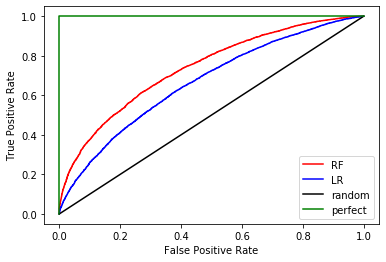

In [22]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1],[0,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

There are a couple things that we can observe from this figure. 
    - A model that randomly guesses the label will result in the black line and you want to have a model that has a curve above this black line. 
    - An ROC that is farther away from the black line is better, so RF (red) looks better than LR (blue).
    - Although not seen directly, a high threshold results in a point in the top right and a low threshold results in a point in the bottom left. This means as you increase the threshold you get higher TPR at a cost of higher FPR. 

To analyze the performance, we will use the area-under-curve metric.

In [23]:
from sklearn.metrics import roc_auc_score

auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)

print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


As you can see, the area under the curve for the RF model is better than the LR. 

When I plot the ROC curve, I like to add the AUC to the legend as shown below. 

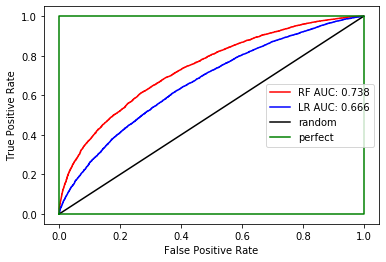

In [27]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1,0],[0,1,1,0,0],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Overall, in this toy example the model RF wins with every performance metric. 

# Conclusion

In predictive analytics, when deciding between two models it is important to pick a single performance metric. As you can see here, there are many that you can choose from (accuracy, recall, precision, f1-score, AUC, etc). Ultimately, you should use the perfomance metric that is most suitable for the business problem at hand. Many data scientists prefer to use the AUC because it does not require selecting a threshold and helps balance true positive rate and false positive rate.  